In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c

In [2]:
def gaussian(x,inten,m,sigma):
    return  - inten*np.exp(-((x-m)/sigma)**2)
xx0 = np.linspace(4000, 5000, num=4000)
faux_spec = np.zeros(4000)

#faux1=gaussian(xx0,20./rand,0.003*abs(rand),3500+rand,0.2)
def spec():
    faux_spec = np.zeros(4000)
    
    for i in range(20):
        rand = np.random.randint(-500,500)

        faux_spec+=gaussian(xx0,20./rand,4500+rand,0.02*abs(rand))
    
    faux_spec = np.abs(faux_spec)
    faux_spec = np.ones(4000) - faux_spec + np.random.normal(0.00,0.005,4000)
    return faux_spec
disp = lambda x,x0 : c.c.to('km/s') * (x/x0 - 1) 

def rest(x,v):
    return  x / ((v/ls.value) + 1)
a=spec()
b=spec()

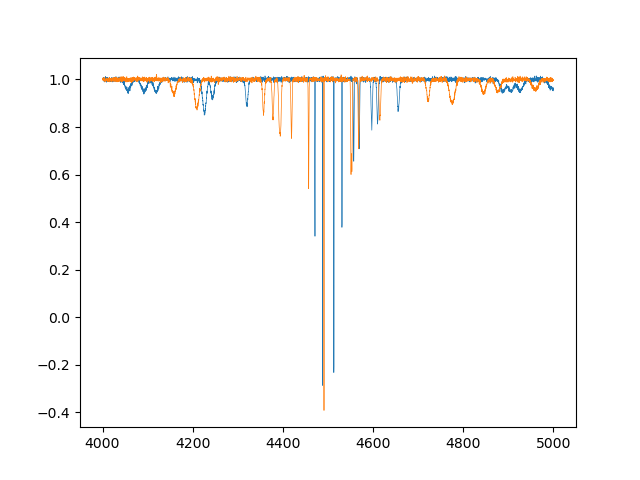

In [3]:
%matplotlib widget
#dos espectros
plt.plot(xx0,b,xx0,a,linewidth=0.5)

In [1]:
#a lets move

In [ ]:
#esto desplaza la longitud de onda, 
#necesitaría implementar algo que mueva el flujo manteniendo las longitudes de onda
a_move = rest(xx0,75)
b_move = rest(xx0,-80)

In [4]:
#xx0 era el array de long. de onda que va de 4000 a 5000 enmascarada entre 4820 y 4980
#si funciona como espero, no se van a hacer operaciones fuera de ese rango
xx0_m=np.ma.masked_inside(xx0,4820,4980)
ma=np.ma.getmask(xx0_m)
xx0_mb = np.ma.masked_inside(xx0,4820,4950)
mab=np.ma.getmask(xx0_mb)
a_m = np.ma.array(a,mask=ma)
b_m = np.ma.array(b,mask=mab)
#ma=np.ma.getmask(b_m)

In [5]:
#armar listas?
mask = [True,False,False]
mask2 = [False,False,True]

In [6]:
%%timeit
mask3 =[True if (a or b) else False for a,b in zip(mask,mask2)]
#mask3

325 ns ± 5.11 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
rega = (4001,4030)
regaa = (4300,4400)
regb=(4500,4550)
regc=(4990,4999)
orega = (4010,4020)
oregaa = (4320,4380)
oregb=(4510,4540)
oregc=(4990,4999)

In [8]:
def mask_regions(x,*args):
    if args is None:
        raise("ValueError: no regions provided")

    regions = np.ma.array([np.ma.masked_inside(x,arg[0],arg[1]) for arg in args]).T
    regions = np.ma.array(regions)
    
    collapse = [regions[i,:].mask.any() for i in range(4000)]
    collapse = np.ma.array(collapse)
    return collapse

In [9]:
masks = mask_regions(xx0,rega,regaa,regb,regc)
mask2 = mask_regions(xx0,orega,oregaa,oregb,oregc)

In [9]:
%%timeit
cor=np.correlate(a[masks],b[mask2],'same')
cor2=np.correlate(a[mask2],b[masks],'same')

119 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
cor=np.correlate(a[masks],b[mask2],'same')
cor2=np.correlate(a[mask2],b[masks],'same')
cor3=np.correlate(a[masks],b[masks],'same')
len(cor3)

752

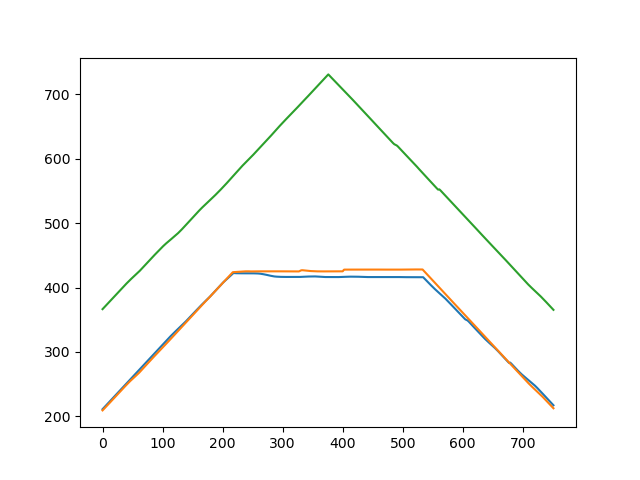

In [11]:
%matplotlib widget
plt.plot(range(752),cor)
plt.plot(range(752),cor2)
plt.plot(range(752),cor3)

#no estan relacionados

In [3]:
#meto dos spectros
#from utils import extract_line
from utils.py import extract_line

ModuleNotFoundError: No module named 'utils.py'; 'utils' is not a package

In [20]:
song_sp = extract_line('song.fits')

NameError: name 'extract_line' is not defined

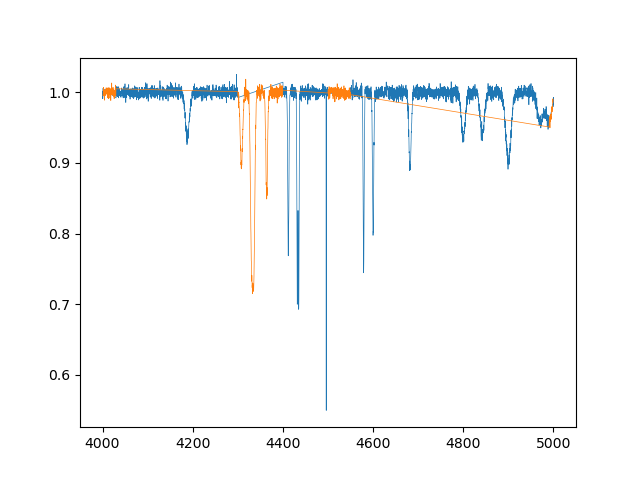

In [113]:
%matplotlib widget
plt.plot(xx0[~masks],a[~masks],xx0[masks],a[masks],linewidth=0.5)

# Con `numpy.correlate`

In [ ]:
np.array(fauma0)

In [ ]:
xx0 = np.linspace(4128, 4132, num=2000)
faux1=gaussian(xx0,cont=1,inten=0.1,m=4130,sigma=0.07)+np.random.normal(0.00,0.008,2000)
masked0=np.ma.masked_outside(xx0,4129.5,4131)
masked0 += np.ones_like(masked0)*0.5
mask0 = np.ma.getmask(masked0)
fauma0=np.array(np.ma.array(faux0,mask=mask0))

plt.plot(xx0,faux0)
plt.plot(masked0,fauma0,linewidth=0.8)

In [ ]:
cor=np.correlate(faux1,fauma0,'same')

In [ ]:
len(cor)

In [ ]:
plt.plot(xx0,cor)

Función de correlacion! Ahora tengo que transformar esto en una VR

In [ ]:
#esto da el indice del array (mas largo) donde se da el máximo de correlación
#por la correspondencia xx0-faux(en este caso el vector más largo), xx0[indice] es valor en lambda donde se da el maximo de correlación 
xmax = xx0[np.argmax(cor)]
xmax 

esto me da el max en el array original, si suponemos que el template ya esta centrado, la diferencia en lambda sale y por lo tanto la vr

4130.5 es la rest en este caso, porque moví el template

In [ ]:
lambda0 = 4130.5
#c en m/s


In [ ]:
disp = lambda x,x0 : c.c.to('km/s') * (x/x0 - 1) 
ls = c.c.to('km/s')
def correlate_velocity_line(spectrum_lambda,spectrum_flux,template,lambda0):
    """Returns velocity in km/s of observed line, based on template and rest lambda `lambda0`"""
    cor=np.correlate(spectrum_flux,template,'same')
    xmax = spectrum_lambda[np.argmax(cor)]
    return disp(xmax,lambda0)

In [ ]:
correlate_velocity_line(xx0,faux0,fauma0,lambda0)

In [ ]:
 (np.ones_like(xx0) * ((-36.3/ls.value) + 1))

In [ ]:
plt.plot(rest(xx0,-36.2174),faux0,xx0,faux0,masked0,fauma0+0.001)
plt.xlim(4130,4131)

# Many regions?

In [ ]:
Cómo va a ser la correlacion cuando haya muchas rgiones? Funcionará 'same'?

In [ ]:
spec = [1 if i%30 == 0 else i/40 for i in range(200)]

In [ ]:
spec += np.random.normal(0.00,0.08,200)
spec2 = spec + np.random.normal(0.00,0.15,200)

In [ ]:
plt.plot(range(200), spec,range(200), spec2)

In [ ]:
mask=[True if i%30 == 0 else False for i in range(200)]
mask2=[False if i%30 == 0 else True for i in range(200)]


In [ ]:
refreg=np.ma.array(spec,mask=mask)
plt.plot(range(200),refreg)

In [ ]:
spec2[mask2]

In [ ]:
correlation=np.correlate(ref2:=np.ma.array(spec2,mask=mask2),refreg,'same')
correlation2=np.correlate(spec2,spec,'same')
plt.plot(range(200),correlation)#,range(200),correlation2)

como las mascaras son opuestas, no hay correlacion que hacer

In [ ]:
correlation2=np.correlate(spec,spec,'full')
plt.plot(range(39),correlation2)

No estoy seguro de cómo lograr que tranabajr lineas por separado. por ahora rref y oreg son mascaras, la correlacion va a ser válida 